<a href="https://colab.research.google.com/github/harshjoshei/051_HarshJoshi/blob/main/Lab_4/Assignment/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Weather dataset- LabelEncoding of features and Train test Division 90%-10% (as my rollno falls in 50-75 category)


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from subprocess import call

In [3]:
# reading data into main_data
from sklearn import datasets, preprocessing

main_data = pd.read_csv("/content/drive/MyDrive/DatasetsForLab/Dataset2.csv")

# labelEncoder Object
label_encoder = preprocessing.LabelEncoder()

for data in main_data:
  print(f"\n\nHeading :- {data}")
  print(list(main_data[data]))
  main_data[data] = label_encoder.fit_transform(main_data[data])
  print(f"\n\nAfter the tranformation of {data}")
  print(list(main_data[data]))



Heading :- Outlook
['R', 'R', 'O', 'S', 'S', 'S', 'O', 'R', 'R', 'S', 'R', 'O', 'O', 'S']


After the tranformation of Outlook
[1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2]


Heading :- Temp
['H', 'H', 'H', 'M', 'M', 'M', 'C', 'C', 'C', 'M', 'M', 'M', 'H', 'M']


After the tranformation of Temp
[1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2]


Heading :- Wind
['F', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T']


After the tranformation of Wind
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]


Heading :- Humidity
['Normal', 'High', 'Normal', 'Normal', 'Normal', 'Low', 'Normal', 'Normal', 'Low', 'High', 'High', 'Low', 'Normal', 'Normal']


After the tranformation of Humidity
[2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2]


Heading :- Class
['N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']


After the tranformation of Class
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [5]:
# now zip all the features of atmosphere

combined_features = tuple(zip(main_data["Outlook"], main_data["Temp"], main_data["Wind"], main_data["Humidity"]))
print("After combining!")

print("Outlook, Temp, Wind, Humidity\n\n")
for pair in combined_features:
    print(pair)

After combining!
Outlook, Temp, Wind, Humidity


(1, 1, 0, 2)
(1, 1, 1, 0)
(0, 1, 0, 2)
(2, 2, 0, 2)
(2, 2, 0, 2)
(2, 2, 1, 1)
(0, 0, 1, 2)
(1, 0, 0, 2)
(1, 0, 0, 1)
(2, 2, 0, 0)
(1, 2, 1, 0)
(0, 2, 1, 1)
(0, 1, 0, 2)
(2, 2, 1, 2)


In [6]:
main_data

,Outlook,Temp,Wind,Humidity,Class
0,1,1,0,2,0
1,1,1,1,0,0
2,0,1,0,2,1
3,2,2,0,2,0
4,2,2,0,2,1
5,2,2,1,1,1
6,0,0,1,2,1
7,1,0,0,2,1
8,1,0,0,1,1
9,2,2,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(combined_features, main_data["Class"], test_size = 0.1, random_state = 51)
print(x_train)

[(0, 1, 0, 2), (1, 0, 0, 2), (1, 1, 1, 0), (2, 2, 0, 2), (0, 0, 1, 2), (1, 2, 1, 0), (0, 2, 1, 1), (0, 1, 0, 2), (2, 2, 1, 2), (1, 1, 0, 2), (2, 2, 1, 1), (2, 2, 0, 0)]


In [8]:
# Create a decisionTreeCalssifier object

from sklearn import metrics

dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

# Accuracy
# print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

In [9]:
y_pred

array([1, 1])

In [10]:
y_test

3    0
8    1
Name: Class, dtype: int64

In [11]:
# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5


In [12]:
# Prediction
print(x_test)

# y_predicted = dtc.predict(x_test)
print("y predicted : ", y_pred)

# y_predicted = dtc.predict(x_test)
print(f"Actual y_test {y_test}")

[(2, 2, 0, 2), (1, 0, 0, 1)]
y predicted :  [1 1]
Actual y_test 3    0
8    1
Name: Class, dtype: int64


Confusion matrix:
[[0 1]
 [0 1]]


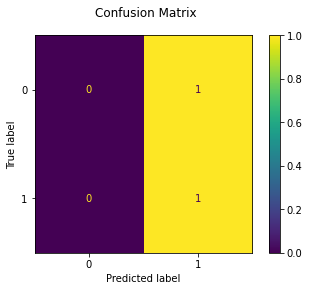

In [13]:
disp = metrics.plot_confusion_matrix(dtc, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [14]:
import tkinter

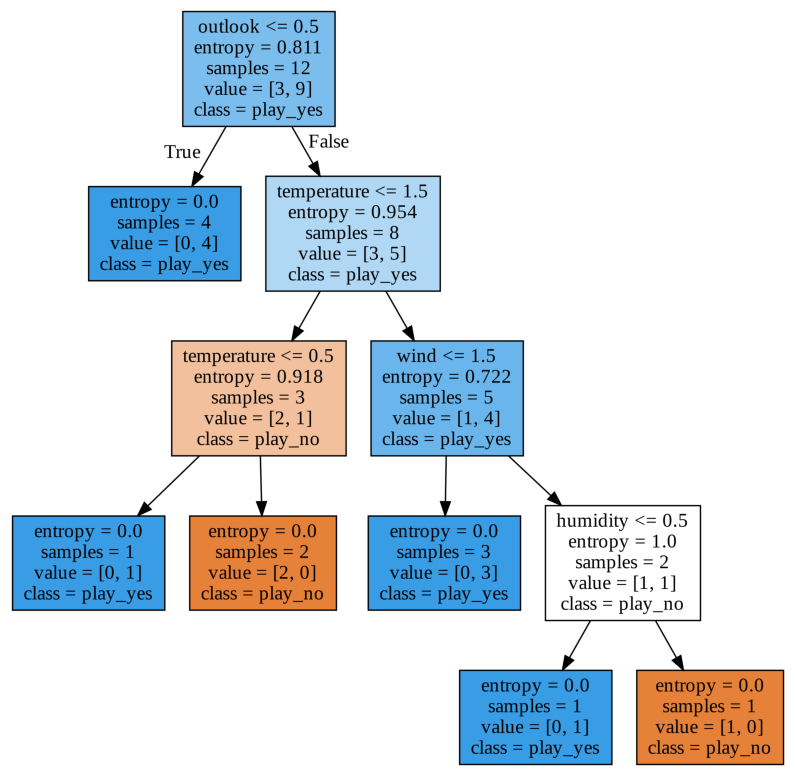

In [15]:
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file='tree_entropy.dot',
               feature_names=['outlook','temperature','humidity','wind'],
               class_names=['play_no','play_yes'], 
               filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();